In [1]:
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from time import time
import os
import pydotplus
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.inspection import plot_partial_dependence, partial_dependence

from six import StringIO
from matplotlib import cm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#Standard libraries for data analysis:
from datetime import date, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score,confusion_matrix

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string

from datetime import datetime
import time
from dateutil.parser import parse
import joblib

In [2]:
#read in data 
df2 = pd.read_csv('C:\Documents\Anagrafica_ClubQ8.csv', sep = ';', decimal=",")

#df2[['YEAR_JOINED','TIME_JOINED']] = df2.DATA_BATTESIMO.str.split(" ",expand=True,)

#df2 = df2.drop(columns="DATA_BATTESIMO")

#rename columns
df2.columns = ['CUSTOMER_CODE', 'SEX', 'DOB', 'REGION', 'PROVINCE', 'CITY', 'TYPE_OF_CARD','DATA_BATTESIMO' ,'TOTAL_POINTS']

df2

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0
...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0


In [3]:
#read in the transaction dataset
df3 = pd.read_csv('C:\Documents\Rifornimenti_Carburante_ClubQ8.csv', sep = ';', decimal=",")

#split year and time
df3[['REQUEST_YEAR','REQUEST_TIME']] = df3.DATA_OPERAZIONE.str.split(" ",expand=True,)

#drop original column
df3 = df3.drop(columns="DATA_OPERAZIONE")
#rename columns
df3.columns = ['CUSTOMER_CODE', 'STATION_CODE', 'PRODUCT', 'SALES_MODALITY', 'LITRES', 'LOYALTY_POINTS_AWARDED','REQUEST_YEAR','REQUEST_TIME']

df3

,CUSTOMER_CODE,STATION_CODE,PRODUCT,SALES_MODALITY,LITRES,LOYALTY_POINTS_AWARDED,REQUEST_YEAR,REQUEST_TIME
0,7071161603600606750,584,CARICO GASOLIO,EASY,7,3,2021-03-01,00:00:57
1,7071161603000039982,155,CARICO GASOLIO,SELF,17,17,2021-03-01,00:02:53
2,7071161603000720656,4803,CARICO GASOLIO,OPT,39,19,2021-03-01,00:03:10
3,7071161603014646483,2491,CARICO HIPERFORM DIESEL,SERVITO,54,54,2021-03-01,00:05:45
4,7071161603011692357,8265,CARICO GPL,SERVITO,31,31,2021-03-01,00:07:29
...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,CARICO GASOLIO,SELF,50,50,2021-08-31,23:58:22
11787858,7071161603020697769,7064,CARICO BENZINA,EASY,12,6,2021-08-31,23:58:26
11787859,7071161603010864247,7933,CARICO BENZINA,OPT,9,4,2021-08-31,23:58:56
11787860,7071161603601882848,5693,CARICO GASOLIO,SERVITO,50,50,2021-08-31,23:59:03


In [4]:
#create a copy of customer id's to keep the customer id's that are only in the transaction datasets when merging
df3['CUSTOMER_CODE2'] = df3['CUSTOMER_CODE']

In [5]:
#take the two columns with customer id's to merge them with the customer database
df3 = df3[['CUSTOMER_CODE', 'CUSTOMER_CODE2']]

df3

,CUSTOMER_CODE,CUSTOMER_CODE2
0,7071161603600606750,7071161603600606750
1,7071161603000039982,7071161603000039982
2,7071161603000720656,7071161603000720656
3,7071161603014646483,7071161603014646483
4,7071161603011692357,7071161603011692357
...,...,...
11787857,7071161603670650324,7071161603670650324
11787858,7071161603020697769,7071161603020697769
11787859,7071161603010864247,7071161603010864247
11787860,7071161603601882848,7071161603601882848


In [6]:
#get a list of unique customer id's that made a transaction
df3 = df3.drop_duplicates()
df3

,CUSTOMER_CODE,CUSTOMER_CODE2
0,7071161603600606750,7071161603600606750
1,7071161603000039982,7071161603000039982
2,7071161603000720656,7071161603000720656
3,7071161603014646483,7071161603014646483
4,7071161603011692357,7071161603011692357
...,...,...
11787602,7071161603601715345,7071161603601715345
11787723,7071161603601882855,7071161603601882855
11787819,7071161603601880743,7071161603601880743
11787824,7071161603601881204,7071161603601881204


In [7]:
#merge the list with customers that made a transaction with the customer database
dfnew = pd.merge(df2, df3, how = 'left')
dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,NaN
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0,7.071162e+18
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,NaN
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18
...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0,7.071162e+18


In [8]:
#fill na's with 0 to prepare for variable recoding
dfnew['CUSTOMER_CODE2'] = dfnew['CUSTOMER_CODE2'].fillna(0.0)
#create a variable churn that is equal to 1 when the customer has a customer id that is not in the list of customers that made a transaction
dfnew['Churn'] = np.where(dfnew['CUSTOMER_CODE2'] == 0.0, 1, 0)   

dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2,Churn
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,0.000000e+00,1
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0,7.071162e+18,0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,0.000000e+00,1
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18,0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18,0
...,...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18,0
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18,0
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18,0
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0,7.071162e+18,0


In [9]:
#create a function that computes the age based on comparing the current date with the date of birth
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d %H:%M:%S").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

#construct a variable that computes the age for each customer
dfnew['Age'] = dfnew['DOB'].apply(age)



In [10]:
dfnew = dfnew[dfnew['DATA_BATTESIMO'].notna()]
#similar function to before to compute the duration of membership for each customer by subracting the date of joining from the current date
def age(born):
    born = datetime.strptime(str(born), "%Y-%m-%d %H:%M:%S").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
#calculate number of years nad convert to months 
dfnew['Tenure in years'] = dfnew['DATA_BATTESIMO'].apply(age)
dfnew['Tenure in months'] = round(dfnew['Tenure in years']*12)

<ipython-input-10-dbce6bf3a7b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Tenure in years'] = dfnew['DATA_BATTESIMO'].apply(age)
<ipython-input-10-dbce6bf3a7b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Tenure in months'] = round(dfnew['Tenure in years']*12)


In [11]:
dfnew.dropna(how='any', inplace=True)

<ipython-input-11-44f874470764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew.dropna(how='any', inplace=True)


In [12]:
# Features
X = pd.concat([dfnew['Age'], dfnew['TOTAL_POINTS']], axis=1, keys=['age' ,'points'])
print("Shape of features' set:", X.shape)

# Response (observed number of claims)
y = dfnew['Churn']
print("Shape of response' set:", y.shape)

Shape of features' set: (1507140, 2)
Shape of response' set: (1507140,)


In [13]:
def filter_std(series: pd.Series, n_std: float):
    m = (series - series.mean()).abs() > n_std * series.std()
    return series[m]

In [14]:
totalpoints = dfnew['TOTAL_POINTS']
totalpoints_outliers = filter_std(totalpoints, n_std=6)

print(f"Identified {len(totalpoints_outliers)} outliers "
      f"({len(totalpoints_outliers) / len(dfnew) * 100:02.2f}% of observations)"
      )

Identified 5763 outliers (0.38% of observations)


In [15]:
from scipy import stats
dfnew[np.abs(dfnew.TOTAL_POINTS-dfnew.TOTAL_POINTS.mean()) <= (6*dfnew.TOTAL_POINTS.std())]
# keep only the ones that are within +6 to -6 standard deviations in the column 'Data'.

dfnew[~(np.abs(dfnew.TOTAL_POINTS-dfnew.TOTAL_POINTS.mean()) > (6*dfnew.TOTAL_POINTS.std()))]

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2,Churn,Age,Tenure in years,Tenure in months
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,0.000000e+00,1,70,7,84
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,0.000000e+00,1,78,1,12
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18,0,47,1,12
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18,0,58,1,12
5,7071161603001130830,F,2000-01-23 00:00:00,PIEMONTE,TORINO,TORINO,STARQ8_FISICA,2020-07-10 18:12:31,175.0,7.071162e+18,0,21,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656131,7071161603601085723,M,1998-06-20 00:00:00,LIGURIA,LA SPEZIA,LA SPEZIA,STARQ8_VIRTUALE,2021-01-18 22:40:56,50.0,0.000000e+00,1,23,0,0
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18,0,59,2,24
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18,0,54,2,24
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18,0,34,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [17]:
def poisson_deviance(y, y_pred):
    
    y = np.array(y)
    y_pred = np.array(y_pred)
    
    nlogn = np.empty(y.size)
    dev = np.empty(y.size)
    
    for i in range(y.size):
        if y[i] == 0:
            nlogn[i] = 0
        else:
            nlogn[i] = y[i] * np.log(y[i] / y_pred[i])
            
        dev[i] = 2 * (nlogn[i] - (y[i] - y_pred[i]))
        
    return(dev.sum())

In [18]:
def mean_poisson_deviance(y, y_pred):
    return(poisson_deviance(y, y_pred)/y.size)

In [19]:
global_lambda = y_train.sum() / y_train.size
print("Global claim frequency:", global_lambda)

Global claim frequency: 0.4196516249319904


In [20]:
# Prediction
y_pred_train = np.repeat(global_lambda, y_train.size)
y_pred_test = np.repeat(global_lambda, y_test.size)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

Mean Poisson deviance on training set: 0.7287925068247796
Mean Poisson deviance on testing set: 0.7287922884150373


In [21]:
dt = tree.DecisionTreeRegressor(criterion = 'mse', min_samples_leaf = 6000, random_state = 2020)

In [22]:

# Training
dt.fit(X_train, y_train)


DecisionTreeRegressor(min_samples_leaf=6000, random_state=2020)

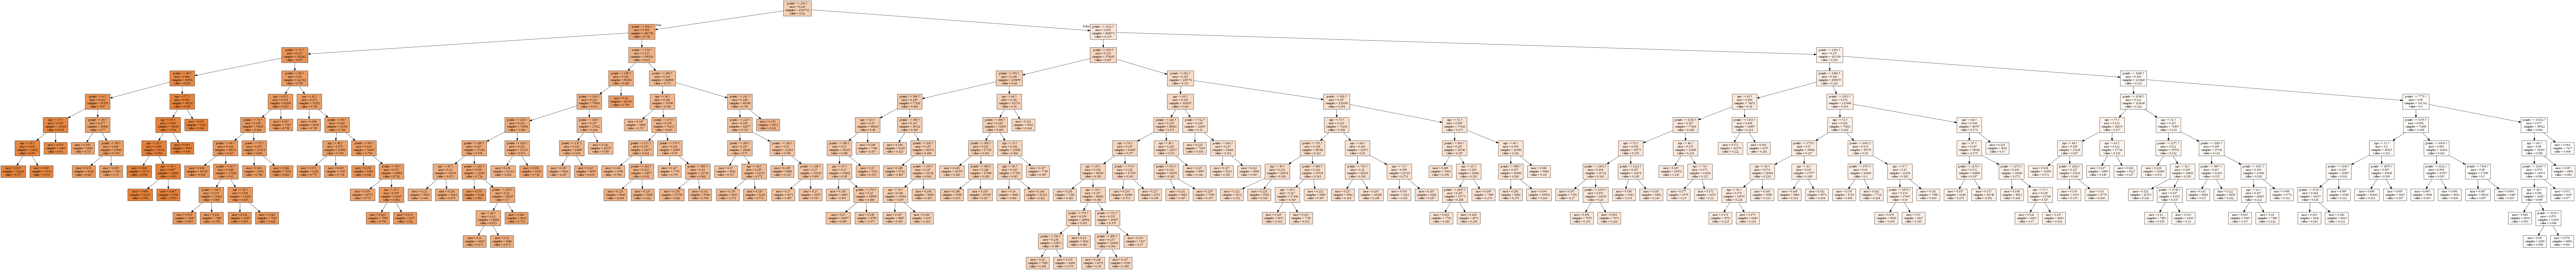

In [23]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, feature_names = list(X_train), filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [25]:
# Prediction
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

Mean Poisson deviance on training set: 0.5681591388949185
Mean Poisson deviance on testing set: 0.5686102611674905


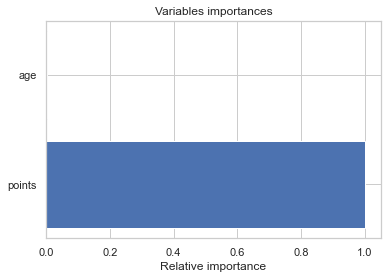

In [24]:
# Features' names
features = list(X_train)

# Importance measures
importances = dt.feature_importances_

# Get the indices of the features with highest importance
indices = np.flip(np.argsort(importances))

# Plot
plt.title('Variables importances')
plt.barh(range(len(indices)), importances[indices] / importances[indices[0]], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [26]:
# Relative importance of the second most important feature (the age)
importances[indices[1]] / importances[indices[0]]

0.003069176796438168

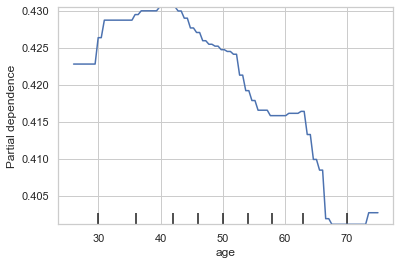

In [27]:
plot_partial_dependence(dt, X_train, [0], method = "brute")

In [ ]:
plot_partial_dependence(dt, X_train, [1], method = "brute")

In [ ]:
plot_partial_dependence(dt, X_train, [(0, 1)], method = "brute")